<a href="https://colab.research.google.com/github/FarahMourad/Face-Recognition/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

## Libraries

In [ ]:
import os
import numpy as np
from PIL import Image
from PIL import ImageChops
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import statistics
from sklearn.model_selection import cross_val_score, StratifiedKFold
import natsort
from sklearn.metrics import ConfusionMatrixDisplay

## Import My Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/kaggle_dataset'

# Download Faces Dataset

## Download Database of Faces

In [ ]:
%cd /content/gdrive/My Drive/kaggle_dataset

/content/gdrive/My Drive/kaggle_dataset


In [ ]:
!ls

face-recognition  kaggle.json  non-faces


In [ ]:
!kaggle datasets download -d kasikrit/att-database-of-faces/

  0% 0.00/3.61M [00:00<?, ?B/s]
100% 3.61M/3.61M [00:00<00:00, 93.1MB/s]


In [ ]:
!mkdir face-recognition
!mv att-database-of-faces.zip face-recognition

mkdir: cannot create directory ‘face-recognition’: File exists


In [ ]:
%cd face-recognition/

/content/gdrive/My Drive/kaggle_dataset/face-recognition


In [ ]:
!unzip att-database-of-faces.zip

Archive:  att-database-of-faces.zip
replace README? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Download Non-Faces Dataset

In [ ]:
%cd /content/gdrive/My Drive/kaggle_dataset

In [ ]:
!ls

In [ ]:
!kaggle datasets download -d prasunroy/natural-images

In [ ]:
!mkdir non-faces
!mv natural-images.zip non-faces

In [ ]:
%cd non-faces/

In [ ]:
!ls

In [ ]:
!unzip natural-images.zip

In [ ]:
!rm -rf '/content/gdrive/MyDrive/kaggle_dataset/non-faces/natural_images'

In [ ]:
!rm -rf '/content/gdrive/MyDrive/kaggle_dataset/non-faces/data'

# Prepare Non-Face Dataset

In [ ]:
pics_no = 10

In [ ]:
non_faces_path = '/content/gdrive/MyDrive/kaggle_dataset/non-faces'
non_faces_data = []
non_faces_labels = []
for root, dirs, files in os.walk(non_faces_path):
        dirs = natsort.natsorted(dirs)
        print(dirs)
        for subdir in dirs:
          subject_path = os.path.join(root , subdir)
          files = natsort.natsorted(os.listdir(subject_path))
          for i in range(pics_no):
              file = files[i]
              img = Image.open(os.path.join(subject_path , file)).convert('L')
              img = img.resize((92, 112),Image.ANTIALIAS)
              non_faces_data.append(np.asarray(img).ravel())
              non_faces_labels.append(0)
# print (non_faces_data[0])


['car', 'cat', 'dog', 'flower', 'fruit', 'motorbike']
[]
[]
[]
[]
[]
[]


In [ ]:
print(len(non_faces_data))

60


# Prepare Faces Dataset

In [ ]:
path = '/content/gdrive/MyDrive/kaggle_dataset/face-recognition'
person_id = 1
#Data matrix
face_data =[]
#label vector
labels = []
faces_labels = []
for root, dirs, files in os.walk(path):
        dirs = natsort.natsorted(dirs)
        #loop through each subject directory
        for subdir in dirs:
            print(subdir)
            subject_path = os.path.join(root , subdir)
            #convert images into a numpy array s
            # list of files in the directory
            files = natsort.natsorted(os.listdir(subject_path))
            for file in files:
              #L only stores a greyscale, not colour
                img = Image.open(os.path.join(subject_path , file)).convert('L') 
                # reval return a contiguous flattened array.
                face_data.append(np.asarray(img).ravel())
                labels.append(person_id)
                faces_labels.append(1)
            person_id += 1
print (face_data[2])


s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
s22
s23
s24
s25
s26
s27
s28
s29
s30
s31
s32
s33
s34
s35
s36
s37
s38
s39
s40
[39 44 53 ... 29 26 29]


# Merging Faces/Non Faces

## Splitting 50/50

In [ ]:
compared_faces_training_set = []
compared_faces_labels_training_set = []
compared_faces_testing_set = []
compared_faces_labels_testing_set = []

non_faces_training_set = []
non_faces_labels_training_set = []
non_faces_testing_set = []
non_faces_labels_testing_set = []

combined = zip(faces_labels, face_data)
non_face_combined = zip(non_faces_labels, non_faces_data)

counter = 0;
for i, j in combined:
    if counter % 2 == 0:
      compared_faces_testing_set.append(j)
      compared_faces_labels_testing_set.append(i)
    else:
      compared_faces_training_set.append(j)
      compared_faces_labels_training_set.append(i)
    counter += 1


counter = 0;
for i, j in non_face_combined:
    if counter % 2 == 0:
      non_faces_testing_set.append(j)
      non_faces_labels_testing_set.append(i)
    else:
      non_faces_training_set.append(j)
      non_faces_labels_training_set.append(i)
    counter += 1

face_nonface_testing_set = np.concatenate((compared_faces_testing_set
, non_faces_testing_set))
face_nonface_training_set = np.concatenate((compared_faces_training_set
, non_faces_training_set))

face_non_faces_label_training_set = np.concatenate((compared_faces_labels_training_set
, non_faces_labels_training_set))

face_non_faces_label_testing_set = np.concatenate((compared_faces_labels_testing_set
, non_faces_labels_testing_set))

print(face_nonface_testing_set)
print(len(face_non_faces_label_testing_set))

[[ 48  49  45 ...  47  46  46]
 [ 39  44  53 ...  29  26  29]
 [ 64  76  80 ...  35  37  39]
 ...
 [253 253 252 ... 254 254 255]
 [254 255 255 ... 253 254 255]
 [255 255 255 ... 255 255 254]]
230


In [ ]:
print(len(compared_faces_labels_training_set))
print(len(non_faces_labels_training_set))

200
201


## Splitting 70/30

In [ ]:
combined = zip(faces_labels, face_data)
non_face_combined = zip(non_faces_labels, non_faces_data)

compared_faces_training_set_70 = []
compared_faces_labels_training_set_70 = []
compared_faces_testing_set_30 = []
compared_faces_labels_testing_set_30 = []

non_faces_training_set_70 = []
non_faces_labels_training_set_70 = []
non_faces_testing_set_30 = []
non_faces_labels_testing_set_30 = []

counter = 0;
for i, j in combined:
    # print(j)
    if counter < 0.7 * pics_no:
      compared_faces_training_set_70.append(j)
      compared_faces_labels_training_set_70.append(i)
    else:
      compared_faces_testing_set_30.append(j)
      compared_faces_labels_testing_set_30.append(i)
    if counter == pics_no - 1:
      counter = 0 
    else:
      counter += 1


counter = 0;

for i, j in non_face_combined:
    if counter < 0.7 * pics_no:
      non_faces_training_set_70.append(j)
      non_faces_labels_training_set_70.append(i)
    else:
      non_faces_testing_set_30.append(j)
      non_faces_labels_testing_set_30.append(i)
    if counter == pics_no - 1:
      counter = 0 
    else:
      counter += 1

face_nonface_testing_set_30 = np.concatenate((compared_faces_testing_set_30
, non_faces_testing_set_30))
face_nonface_training_set_70 = np.concatenate((compared_faces_training_set_70
, non_faces_training_set_70))

face_non_faces_label_training_set_70 = np.concatenate((compared_faces_labels_training_set_70
, non_faces_labels_training_set_70))

face_non_faces_label_testing_set_30 = np.concatenate((compared_faces_labels_testing_set_30
, non_faces_labels_testing_set_30))

print(face_nonface_testing_set_30)
print(len(face_non_faces_label_testing_set_30))

[[ 44  43  32 ...  43  43  37]
 [ 42  41  44 ...  42  43  41]
 [ 34  34  33 ...  37  40  33]
 ...
 [254 254 255 ... 254 254 254]
 [255 255 255 ... 255 255 254]
 [254 254 254 ... 253 253 255]]
138


In [ ]:
print(len(compared_faces_training_set_70))

280


# Split Faces

## Split Faces Dataset 50/50

In [ ]:
faces_training_set = []
labels_training_set = []
faces_testing_set = []
labels_testing_set = []

combined = zip(labels, face_data)
counter = 0;
for i, j in combined:
    if counter % 2 == 0:
      faces_testing_set.append(j)
      labels_testing_set.append(i)
    else:
      faces_training_set.append(j)
      labels_training_set.append(i)
    counter += 1
# 5 instances per person in testing and training


## Split Dataset 70/30

In [ ]:
faces_training_set_70 = []
labels_training_set_70 = []
faces_testing_set_30 = []
labels_testing_set_30 = []

combined = zip(labels, face_data)
# print(tuple(combined))
counter = 0;
for i, j in combined:
    if counter < 7:
      faces_training_set_70.append(j)
      labels_training_set_70.append(i)
    else:
      faces_testing_set_30.append(j)
      labels_testing_set_30.append(i)
    if counter == 9:
      counter = 0 
    else:
      counter += 1
print (labels_testing_set_30)

[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 39, 40, 40, 40]


In [ ]:
print(len(labels_training_set_70))

280


# KNeighbors Classifier

In [ ]:
def KNeighbors_bestK(X_train,Y_train):
  bestAcc = 0
  acc = []

  for k in range(1,8,2):
      model = KNeighborsClassifier(n_neighbors = k)
      cv = StratifiedKFold(n_splits=5)
      scores = cross_val_score(model, X_train, Y_train, cv=cv)
      currentAccuracy = statistics.mean(scores)
      acc = np.append(acc,currentAccuracy)

      if currentAccuracy > bestAcc :
        bestAcc=currentAccuracy
        bestK=k


  print("Validation Accuracy:\n",list(range(1,8,2)),"\n", acc,"\n")
  print("Best K:", bestK, ", Validation Accuracy:", bestAcc,"\n")

  return bestK

In [ ]:
def test_KNeighborsClassifier(X_train, Y_train, X_test, Y_test, k):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, Y_train)
  Y_pred = knn.predict(X_test)

  return metrics.accuracy_score(Y_test, Y_pred)
  #print("Testing Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

# PCA

In [ ]:

def PCA(D,alpha):
  # Compute Covariance mat
  COV = np.cov(D, rowvar = False, bias = True)
  # print("\nCOV:\n", COV)
  
  # Compute Eigen Vector and values of COV
  V, U = np.linalg.eigh(COV)
  
  # Order Eigen values and vectors in decreasing order
  idx = V.argsort()[::-1]
  V = V[idx]
  U = U[:,idx]
  # print("\nEigen Values:\n", V,"\n\nEigen Vectors:\n", U)
  # print()

  # get smallest r so that explained variance exceeds alpha
  d = np.shape(D)[1]
  for r in range (1, d):
    f = np.sum(V[:r]) / np.sum(V)
    # print("r:", r, ", f: ", f);
    if f >= alpha:
      break
  
  # print("\nBest Dimension (r):",r,"\n")

  # get projection matrix
  P = U[:,:r]
  # print("\nProjection Matrix (P): \n", P)
  # print()
  return P

def projectdata(X_train, X_test,P):
  return np.matmul(X_train,P), np.matmul(X_test,P)


In [ ]:
def run_PCA(train_X, train_Y, test_X, test_Y):
  # alphas = [0.8, 0.85, 0.9, 0.95]
  alphas = [0.8]
  accuracy_alpha = []

  for alpha in alphas:
    # print("ALPHA:", alpha)
    accuracy_k = []

    P_PCA = PCA(train_X,alpha)

    projected_train_X, projected_test_X = projectdata(train_X, test_X, P_PCA)

    acc = test_KNeighborsClassifier(projected_train_X, train_Y, projected_test_X, test_Y, 1)
    accuracy_alpha.append(float("{:.1f}".format(acc*100)))

    for k in range(1,3,2):
      acc = test_KNeighborsClassifier(projected_train_X, train_Y, projected_test_X, test_Y, k)
      accuracy_k.append(float("{:.1f}".format(acc*100)))
    
    # print("\nAccuracies of different k:", accuracy_k)
  
  print("\n", accuracy_alpha)
  print("_________________________________________")


In [ ]:
print("1500 non-faces - 400 faces / 50-50 split")
run_PCA(face_nonface_training_set,face_non_faces_label_training_set, face_nonface_testing_set,face_non_faces_label_testing_set)

print("1500 non-faces - 400 faces / 70-30 split")
run_PCA(face_nonface_training_set_70,face_non_faces_label_training_set_70, face_nonface_testing_set_30,face_non_faces_label_testing_set_30)

1500 non-faces - 400 faces / 50-50 split


# LDA

In [ ]:
def test_projection(eigen, num, training_set,testing_set,labels_train):
  P = eigen[:, 0:num]

  Project_train = np.dot(training_set,P)
  Project_test = np.dot(testing_set,P)
  knn = KNeighborsClassifier(n_neighbors=1)
  knn.fit(Project_train, labels_train)
  y_pred = knn.predict(Project_test)

  return y_pred

In [ ]:
def print_report(y_test, y_pred):
    # Performance Report
    print("\n",metrics.classification_report(y_test, y_pred), "\n",)

    # Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    plot = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['g','h'])
    plot.plot()
    plt.show()

In [ ]:
def LDA_faces(training_set,per_class):
  set_length = len(training_set)
  means = []
  overall_mean = np.mean(training_set,axis=0)
  for i in range(0,set_length,per_class):
    means.append(np.mean(training_set[i:i+per_class],axis=0))
  print(len(means))
  #print(len(means))
  
  Sb = np.zeros((10304,10304))
  for x in range(40):
    mat = (np.subtract(means[x],overall_mean)).reshape(1,10304)
    dots = np.dot(np.transpose(mat),mat)
    Sb = Sb + (per_class*dots)
  #print(Sb)
  print(Sb.shape)
  
  S = np.zeros((10304,10304))
  k=0
  for j in range(0,set_length,per_class):
    Zi = np.subtract(training_set[j:j+per_class],np.transpose(means[k]))
    k=k+1
    Si = np.dot(np.transpose(Zi),Zi)
    S = S+Si
  
  S_inverse = np.linalg.inv(S)
  #print(S_inverse)
  
  eigenvalues, eigenvectors = np.linalg.eigh(np.dot(S_inverse,Sb))
  #print(eigenvalues)
  
  return eigenvectors

In [ ]:
def LDA_nonfaces(training_set,faces):
  print(len(training_set))
  means = []
  overall_mean = np.mean(training_set,axis=0)
  means.append(np.mean(training_set[0:faces],axis=0))
  means.append(np.mean(training_set[faces:len(training_set)],axis=0))
  print(len(means))
  #print(len(means))
  
  Sb = np.zeros((10304,10304))
  mat = (np.subtract(means[0],overall_mean)).reshape(1,10304)
  dots = np.dot(np.transpose(mat),mat)
  Sb = Sb + (faces*dots)
  mat = (np.subtract(means[1],overall_mean)).reshape(1,10304)
  dots = np.dot(np.transpose(mat),mat)
  Sb = Sb + ((len(training_set)-faces)*dots)
  #print(Sb)
  print(Sb.shape)
  
  S = np.zeros((10304,10304))
  Zi = np.subtract(training_set[0:faces],np.transpose(means[0]))
  Si = np.dot(np.transpose(Zi),Zi)
  S = S+Si
  Zi = np.subtract(training_set[faces:len(training_set)],np.transpose(means[1]))
  Si = np.dot(np.transpose(Zi),Zi)
  S = S+Si

  S_inverse = np.linalg.inv(S)
  #print(S_inverse)
  
  eigenvalues, eigenvectors = np.linalg.eigh(np.dot(S_inverse,Sb))
  #print(eigenvalues)
  
  idx = eigenvalues.argsort()[::-1]   
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:,idx]
  
  return eigenvectors

In [ ]:
#for faces dataset
#50/50 data split
eigen_50 = LDA_faces(faces_training_set,5)
y_pred_50 = test_projection(eigen_50,39,faces_training_set,faces_testing_set,labels_training_set)
print(metrics.accuracy_score(labels_testing_set_30, y_pred_70))
#print_report(labels_testing_set,y_pred_50)

In [ ]:
#70/30 data split
eigen_70 = LDA_faces(faces_training_set_70,7)
y_pred_70 = test_projection(eigen_70,39,faces_training_set_70,faces_testing_set_30,labels_training_set_70)
print(metrics.accuracy_score(labels_testing_set_30, y_pred_70))
#print_report(labels_testing_set_30,y_pred_70)

In [ ]:
#for non faces dataset
#70/30 data split
eigen_70 = LDA_nonfaces(face_nonface_training_set_70,280)
y_pred_70 = test_projection(eigen_70,1,face_nonface_training_set_70,face_nonface_testing_set_30,face_non_faces_label_training_set_70)
print(len(y_pred_50))
print(len(face_non_faces_label_testing_set))
#print_report(face_non_faces_label_testing_set_30,y_pred_70)

322
2
(10304, 10304)
230
230


In [ ]:
#50/50 data split
eigen_50 = LDA_nonfaces(face_nonface_training_set,200)
y_pred_50 = test_projection(eigen_50,1,face_nonface_training_set,face_nonface_testing_set,face_non_faces_label_training_set)
#print_report(face_non_faces_label_testing_set,y_pred_50)

230
2
(10304, 10304)
230
230


In [ ]:
success = []
fail = []

for i in range(len(y_pred_70)):
  if y_pred_70[i] == face_non_faces_label_testing_set_30[i]:
    success.append(i)
  else:
    fail.append(i)

In [ ]:
print("Success=",len(success))
print("Fail=",len(fail))

Success= 129
Fail= 9


Predicted as: face


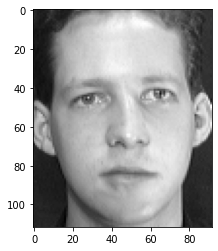

Predicted as: face


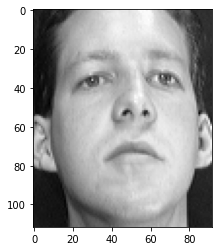

Predicted as: face


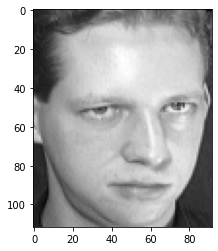

Predicted as: face


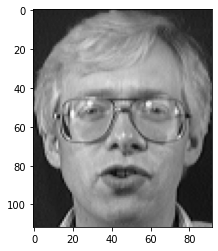

Predicted as: face


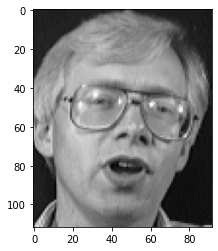

Predicted as: face


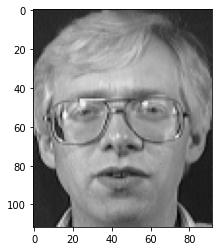

Predicted as: face


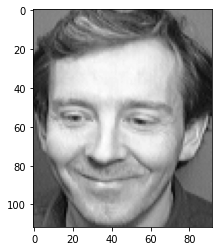

Predicted as: face


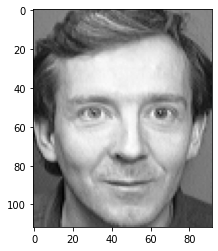

Predicted as: face


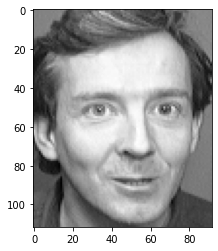

Predicted as: face


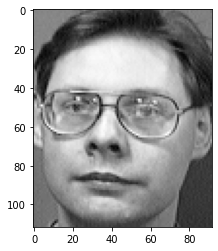

Predicted as: face


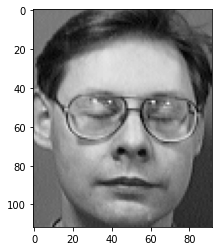

Predicted as: face


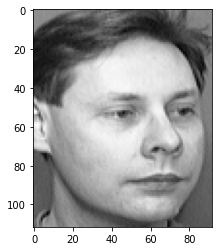

Predicted as: face


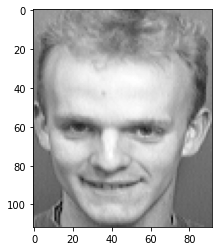

Predicted as: face


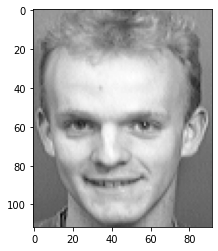

Predicted as: face


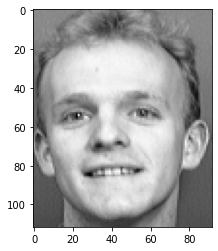

Predicted as: face


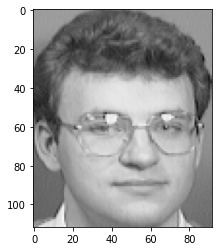

Predicted as: face


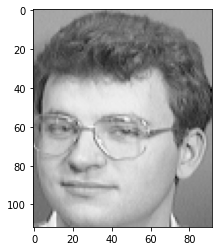

Predicted as: face


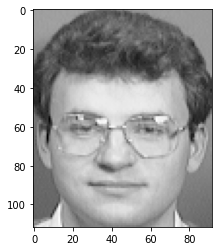

Predicted as: face


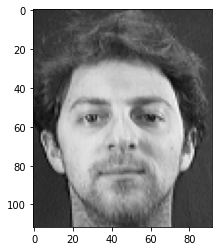

Predicted as: face


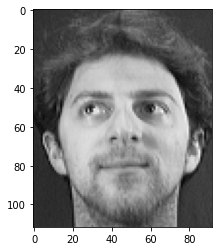

Predicted as: face


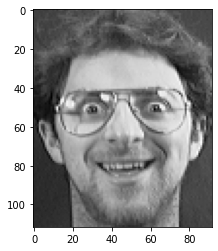

Predicted as: face


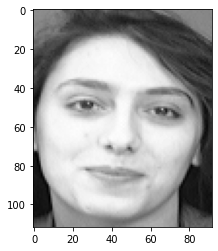

Predicted as: face


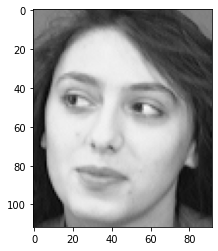

Predicted as: face


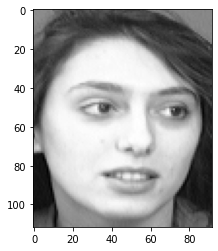

Predicted as: face


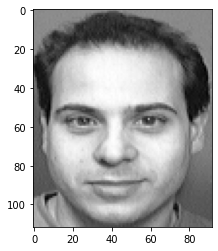

Predicted as: face


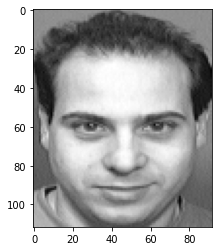

Predicted as: face


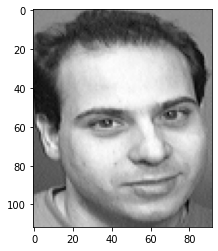

Predicted as: face


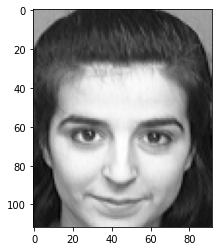

Predicted as: face


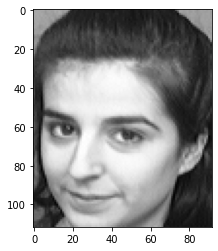

Predicted as: face


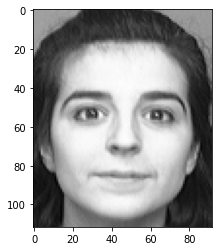

Predicted as: face


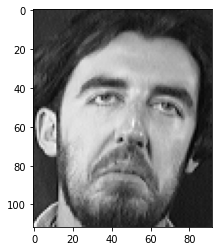

Predicted as: face


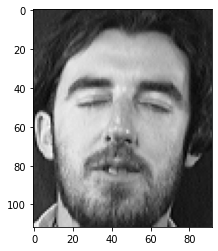

Predicted as: face


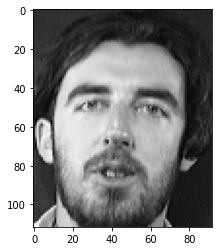

Predicted as: face


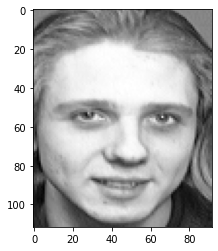

Predicted as: face


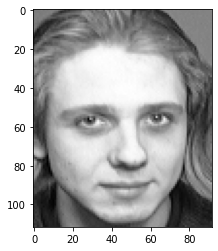

Predicted as: face


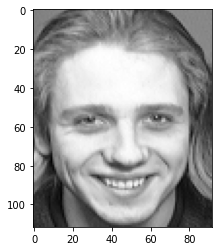

Predicted as: face


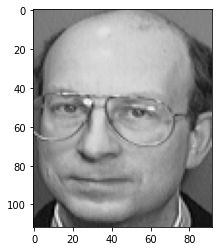

Predicted as: face


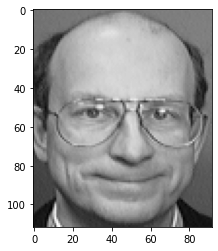

Predicted as: face


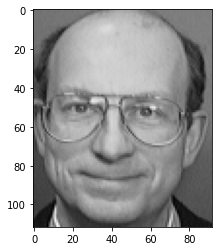

Predicted as: face


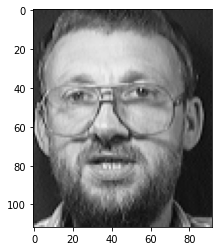

Predicted as: face


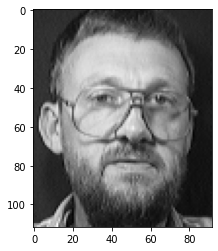

Predicted as: face


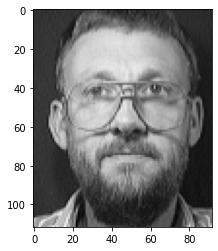

Predicted as: face


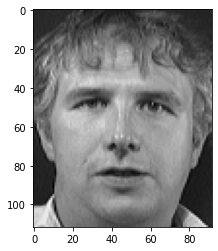

Predicted as: face


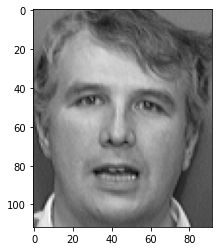

Predicted as: face


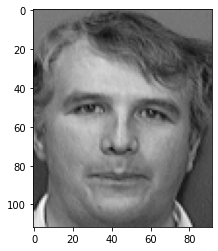

Predicted as: face


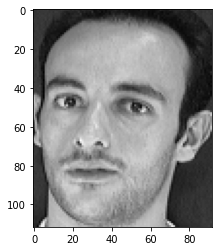

Predicted as: face


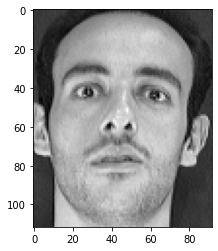

Predicted as: face


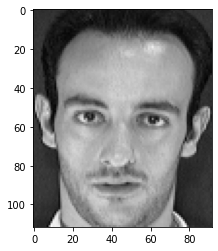

Predicted as: face


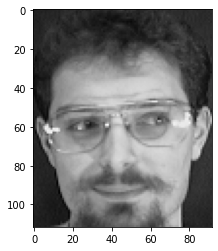

Predicted as: face


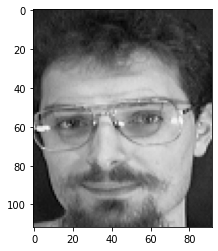

Predicted as: face


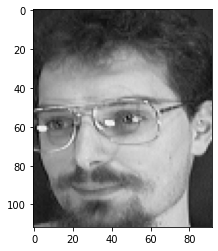

Predicted as: face


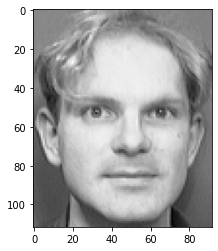

Predicted as: face


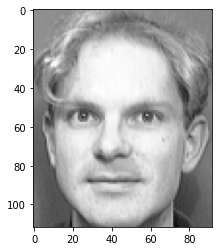

Predicted as: face


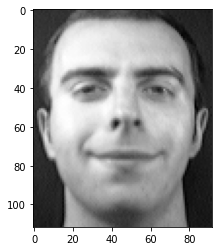

Predicted as: face


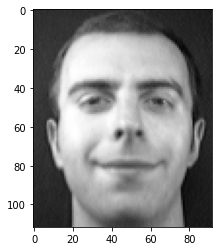

Predicted as: face


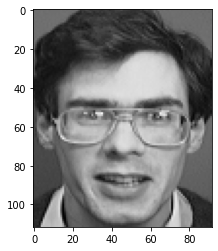

Predicted as: face


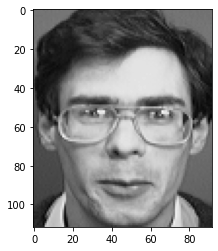

Predicted as: face


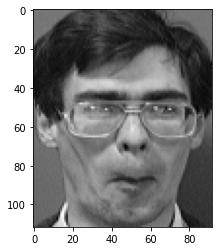

Predicted as: face


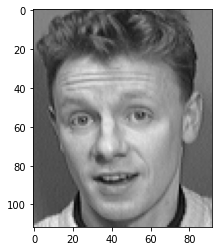

Predicted as: face


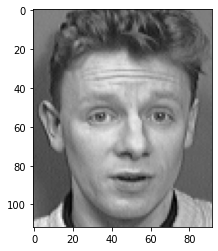

Predicted as: face


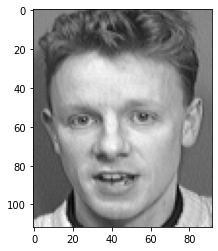

Predicted as: face


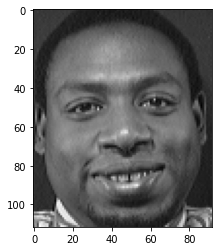

Predicted as: face


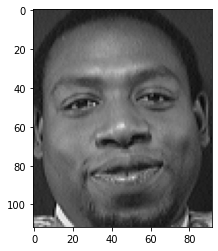

Predicted as: face


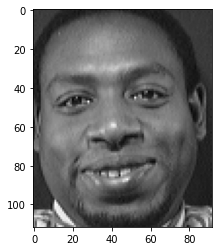

Predicted as: face


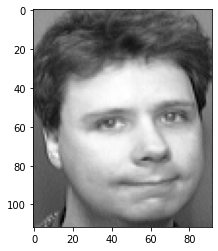

Predicted as: face


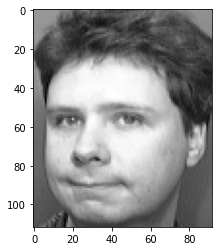

Predicted as: face


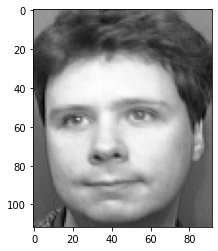

Predicted as: face


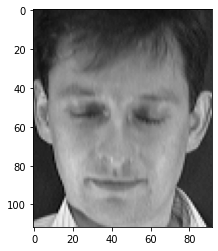

Predicted as: face


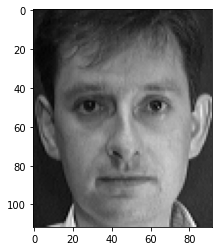

Predicted as: face


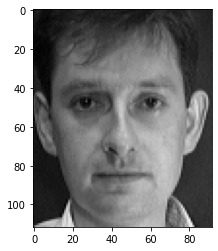

Predicted as: face


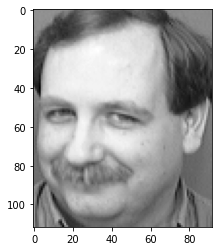

Predicted as: face


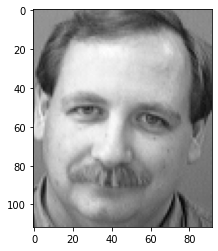

Predicted as: face


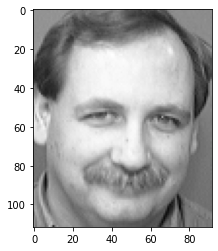

Predicted as: face


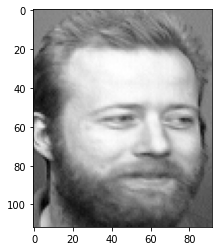

Predicted as: face


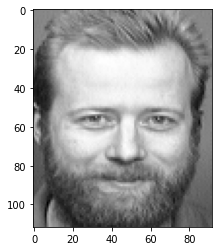

Predicted as: face


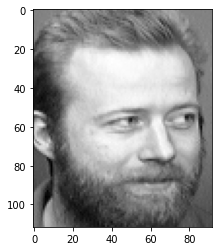

Predicted as: face


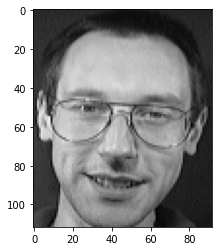

Predicted as: face


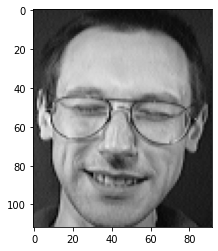

Predicted as: face


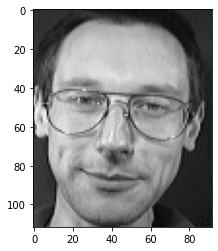

Predicted as: face


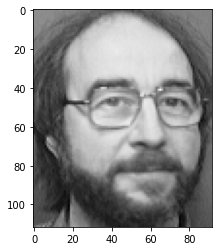

Predicted as: face


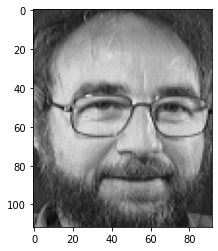

Predicted as: face


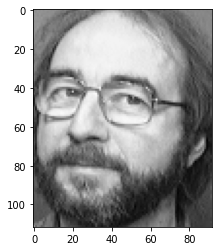

Predicted as: face


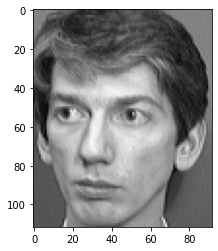

Predicted as: face


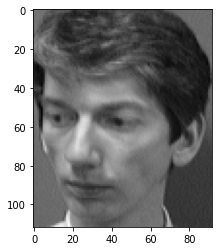

Predicted as: face


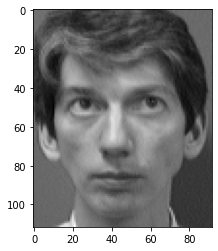

Predicted as: face


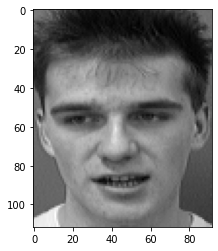

Predicted as: face


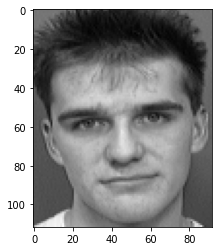

Predicted as: face


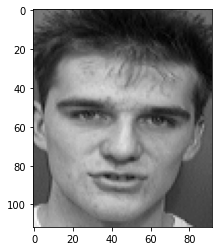

Predicted as: face


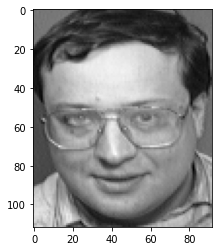

Predicted as: face


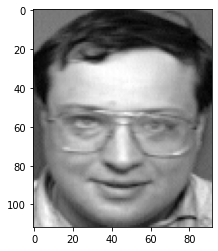

Predicted as: face


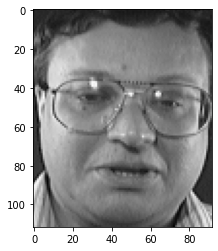

Predicted as: face


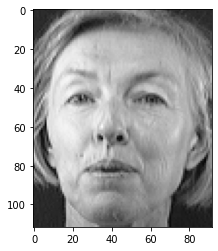

Predicted as: face


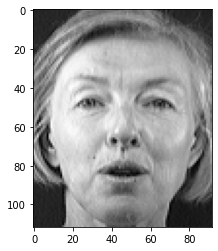

Predicted as: face


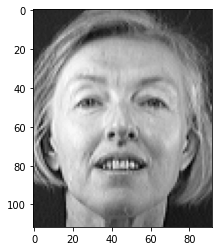

Predicted as: face


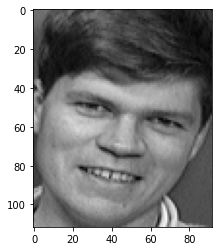

Predicted as: face


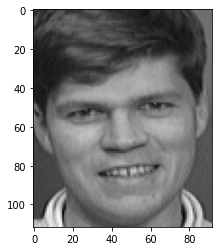

Predicted as: face


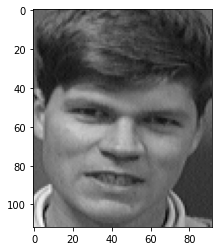

Predicted as: face


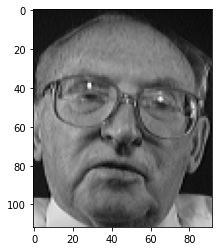

Predicted as: face


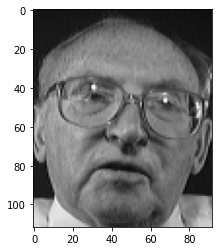

Predicted as: face


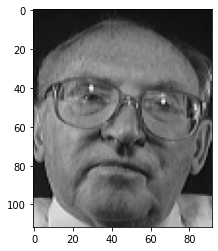

Predicted as: face


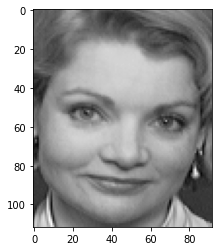

Predicted as: face


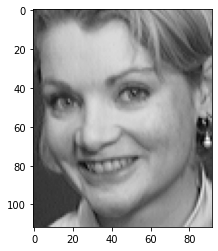

Predicted as: face


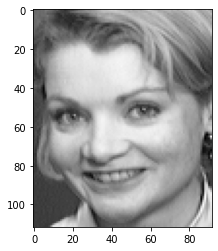

Predicted as: face


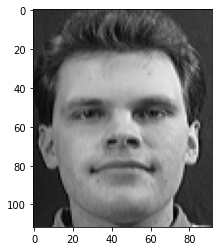

Predicted as: face


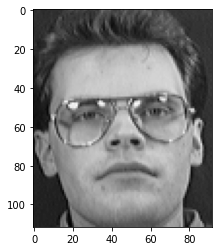

Predicted as: face


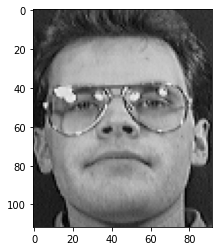

Predicted as: face


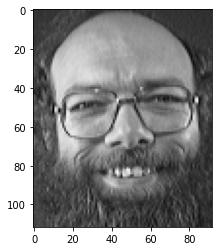

Predicted as: face


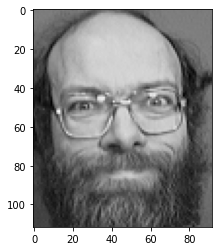

Predicted as: face


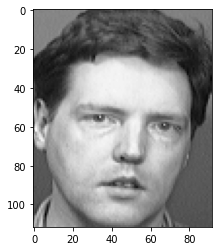

Predicted as: face


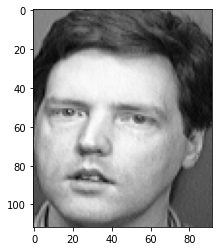

Predicted as: face


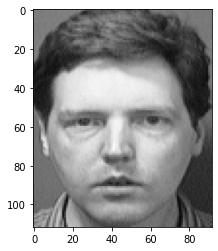

Predicted as: face


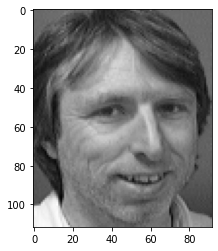

Predicted as: face


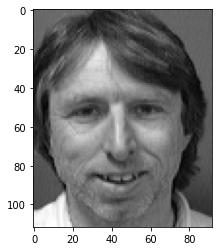

Predicted as: face


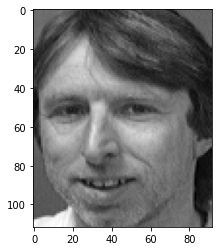

Predicted as: face


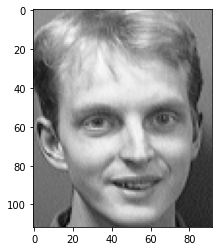

Predicted as: face


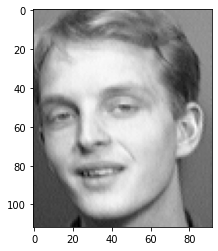

Predicted as: face


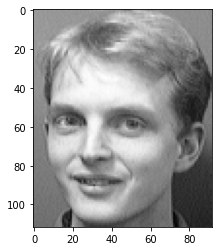

Predicted as: non face


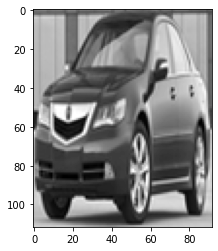

Predicted as: non face


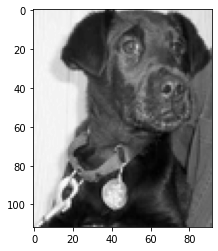

Predicted as: non face


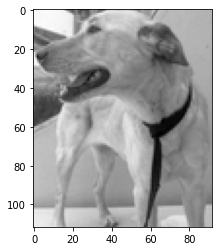

Predicted as: non face


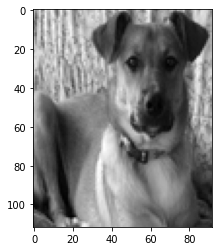

Predicted as: non face


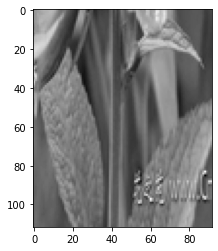

Predicted as: non face


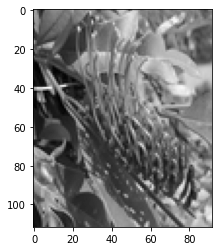

Predicted as: non face


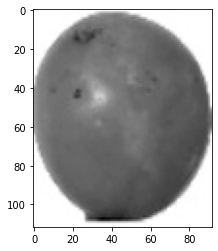

Predicted as: non face


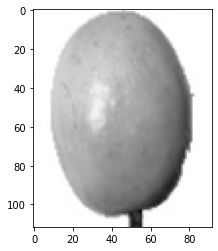

Predicted as: non face


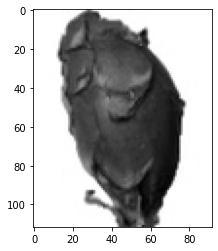

Predicted as: non face


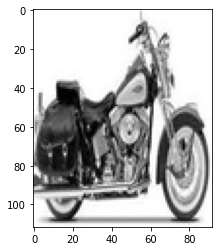

Predicted as: non face


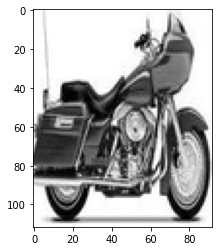

Predicted as: non face


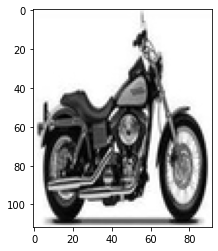

In [ ]:
for j in range(len(success)):
  if y_pred_70[success[j]] == 0:
    print("Predicted as: non face")
  else:
    print("Predicted as: face")
  my_img=np.reshape(face_nonface_testing_set_30[success[j]],(112,92))
  plt.imshow(my_img, cmap='gray')
  plt.show()
  plt.close()

Predicted as: non face


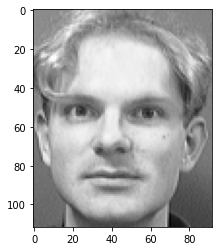

Predicted as: non face


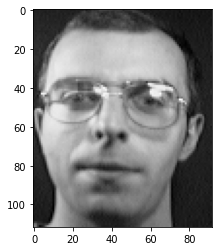

Predicted as: non face


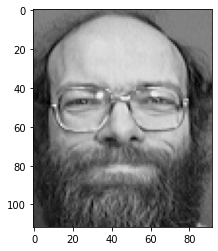

Predicted as: face


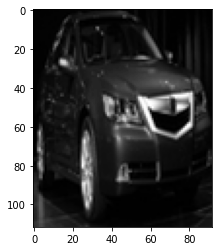

Predicted as: face


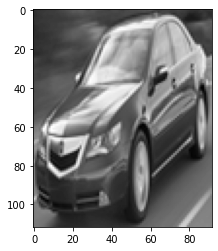

Predicted as: face


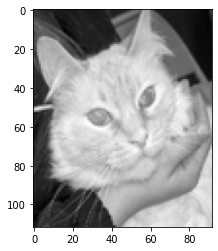

Predicted as: face


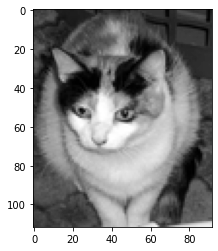

Predicted as: face


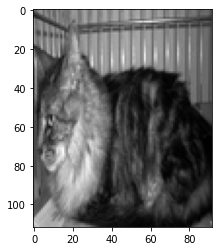

Predicted as: face


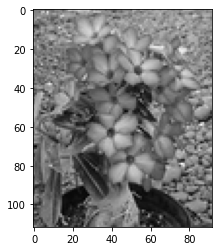

In [ ]:
for j in range(len(fail)):
  if y_pred_70[fail[j]] == 0:
    print("Predicted as: non face")
  else:
    print("Predicted as: face")
  my_img=np.reshape(face_nonface_testing_set_30[fail[j]],(112,92))
  plt.imshow(my_img, cmap='gray')
  plt.show()
  plt.close()